In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU

In [5]:

names = os.listdir("/content/drive/MyDrive/fruit dataset/")
print("Name of the Fruits and Category \n", names[0:6])
# Name of the Fruits and Category 
#  ['fresh bananas', 'fresh oranges', 'rotten apples', 'fresh apples', 'rotten bananas', 'rotten oranges']
images = []
x = []
y = []
for folder in names:
  files = os.listdir("/content/drive/MyDrive/fruit dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/fruit dataset/"+folder+"/"+file,target_size=(200,200))
    images.append(img)
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))

Name of the Fruits and Category 
 ['fresh bananas', 'fresh oranges', 'rotten apples', 'fresh apples', 'rotten bananas', 'rotten oranges']


In [6]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)
(850, 200, 200, 3)
(850,)
y = to_categorical(y)
print(y.shape)
(850, 6)
x = x/255

(850, 200, 200, 3)
(850,)
(850, 6)


# Model 1

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

callback = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(200,200,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(64,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(128,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(256,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(180,activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(100,activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
his = model.fit(xtrain,ytrain,batch_size=64,epochs=50,validation_data=(xtest,ytest), verbose = 1, callbacks=[callback])
#categorical_crossentropy
# squared_hinge
#sparse_categorical_crossentropy
# kullback_leibler_divergence

Epoch 1/50
11/11 [==============================] - 41s 2s/step - loss: 2.3423 - accuracy: 0.2132 - val_loss: 1.6034 - val_accuracy: 0.3235
Epoch 2/50
11/11 [==============================] - 11s 960ms/step - loss: 1.6336 - accuracy: 0.3309 - val_loss: 1.4674 - val_accuracy: 0.4529
Epoch 3/50
11/11 [==============================] - 10s 959ms/step - loss: 1.1077 - accuracy: 0.5353 - val_loss: 0.9973 - val_accuracy: 0.6471
Epoch 4/50
11/11 [==============================] - 10s 955ms/step - loss: 0.9215 - accuracy: 0.6544 - val_loss: 0.7404 - val_accuracy: 0.7471
Epoch 5/50
11/11 [==============================] - 10s 953ms/step - loss: 0.6606 - accuracy: 0.7574 - val_loss: 0.7213 - val_accuracy: 0.7353
Epoch 6/50
11/11 [==============================] - 10s 956ms/step - loss: 0.5648 - accuracy: 0.7809 - val_loss: 0.6027 - val_accuracy: 0.7706
Epoch 7/50
11/11 [==============================] - 11s 965ms/step - loss: 0.4835 - accuracy: 0.8132 - val_loss: 0.4256 - val_accuracy: 0.8294
Ep

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 94, 128)       147584    
                                                        

In [9]:

model.save('/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/cnn_tunned_final_model.h5')

In [17]:
import tensorflow as tf
TF_LITE_MODEL_FILE_NAME = '/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/tf_lite_model.tflite'
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

tf_lite_model_name = TF_LITE_MODEL_FILE_NAME
open(tf_lite_model_name, 'wb').write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmpjw72yauf/assets


INFO:tensorflow:Assets written to: /tmp/tmpjw72yauf/assets


85949184

In [13]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), 'KB')

File size: 83934.75 Kilobytes


# Check Tensor shape

In [16]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 200 200   3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 6]
Output Type: <class 'numpy.float32'>


In [19]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/test1.png')
tf_model_predictions = tflite_model.predict(img)

AttributeError: ignored

# Plot Model

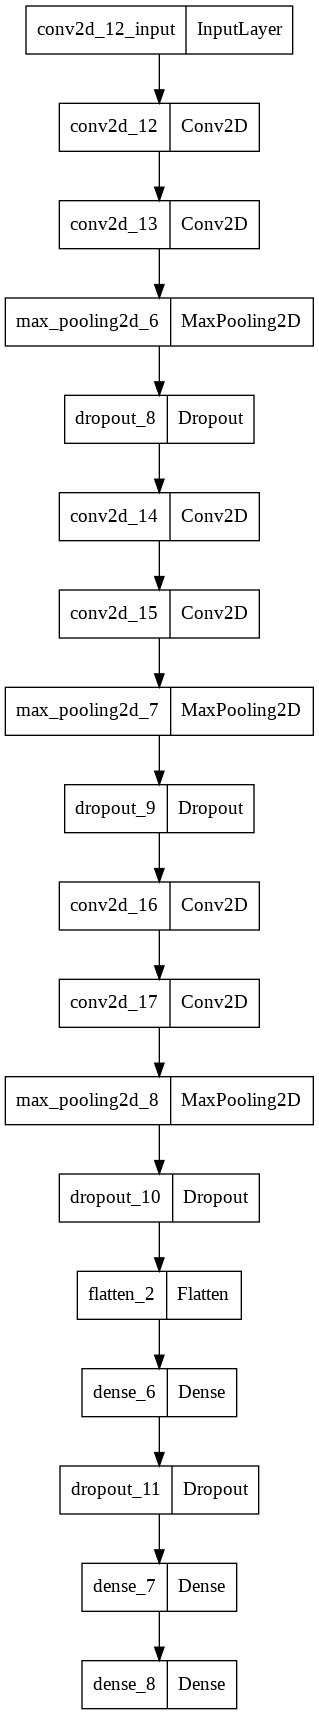

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    to_file="/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/cnn_tunned_model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

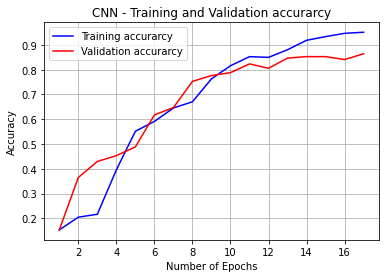

In [ ]:
#get the details form the history object
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('CNN - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/CNN_Accuracy_14_epoch.png")

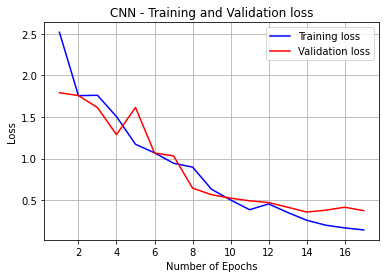

In [ ]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/CNN_Loss_15_epoch.png")

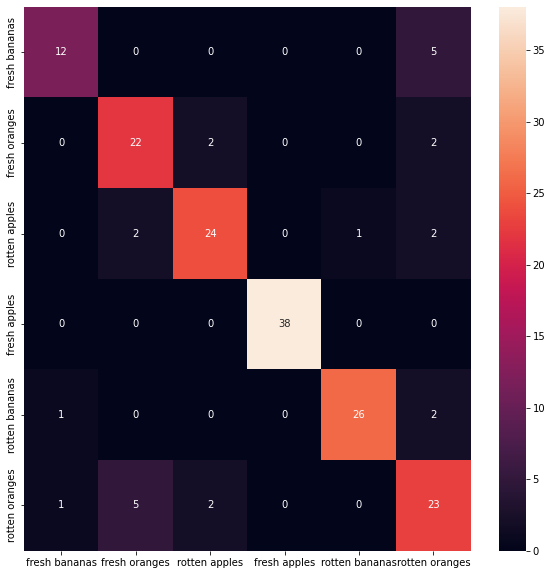

[[12  0  0  0  0  5]
 [ 0 22  2  0  0  2]
 [ 0  2 24  0  1  2]
 [ 0  0  0 38  0  0]
 [ 1  0  0  0 26  2]
 [ 1  5  2  0  0 23]]


<Figure size 432x288 with 0 Axes>

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()
print(conf_mat)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/confusion_matrix_14_epochs.png")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print('Classification Report')
print(classification_report(y_true,y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.76      0.85      0.80        26
           2       0.86      0.83      0.84        29
           3       1.00      1.00      1.00        38
           4       0.96      0.90      0.93        29
           5       0.68      0.74      0.71        31

    accuracy                           0.85       170
   macro avg       0.85      0.84      0.84       170
weighted avg       0.86      0.85      0.85       170



In [20]:
# Quantized tflite model